In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**IMDB MOVIES DATA ANALYSIS**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("/content/drive/MyDrive/imdb_top_1000.csv")

In [6]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [7]:
df.tail()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [8]:
df.shape

(1000, 16)

In [9]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [10]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [11]:
df["Certificate"].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [12]:
D=df['Gross'].loc[df['Gross']==0]
print(D)

Series([], Name: Gross, dtype: object)


In [13]:
mean_meta=df['Meta_score'].mean()

In [14]:
print(mean_meta)

77.97153024911032


In [15]:
df['Meta_score']=df['Meta_score'].fillna(mean_meta)

In [16]:
df['Gross'] = df['Gross'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Gross'] = df['Gross'].apply(lambda x: float(x))
mean_meta = df['Gross'].mean()
print(mean_meta)

68034750.87364621


In [17]:
df['Gross']=df['Gross'].fillna(mean_meta)

In [18]:
df['Gross']

0      2.834147e+07
1      1.349664e+08
2      5.348584e+08
3      5.730000e+07
4      4.360000e+06
           ...     
995    6.803475e+07
996    6.803475e+07
997    3.050000e+07
998    6.803475e+07
999    6.803475e+07
Name: Gross, Length: 1000, dtype: float64

In [19]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [20]:
df['Certificate'].mode()

0    U
Name: Certificate, dtype: object

In [22]:
count=df['Certificate'].value_counts()['U']
print(count)#count of U

234


In [23]:
df['Certificate'] = df['Certificate'].fillna(count)

In [24]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [25]:
##There is no null value is present.

In [26]:
df['Runtime']

0      142 min
1      175 min
2      152 min
3      202 min
4       96 min
        ...   
995    115 min
996    201 min
997    118 min
998     97 min
999     86 min
Name: Runtime, Length: 1000, dtype: object

In [27]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [28]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [29]:
x = df['Released_Year'].loc[df['Released_Year'] == 'PG']
print(x)

966    PG
Name: Released_Year, dtype: object


<Axes: xlabel='Certificate', ylabel='count'>

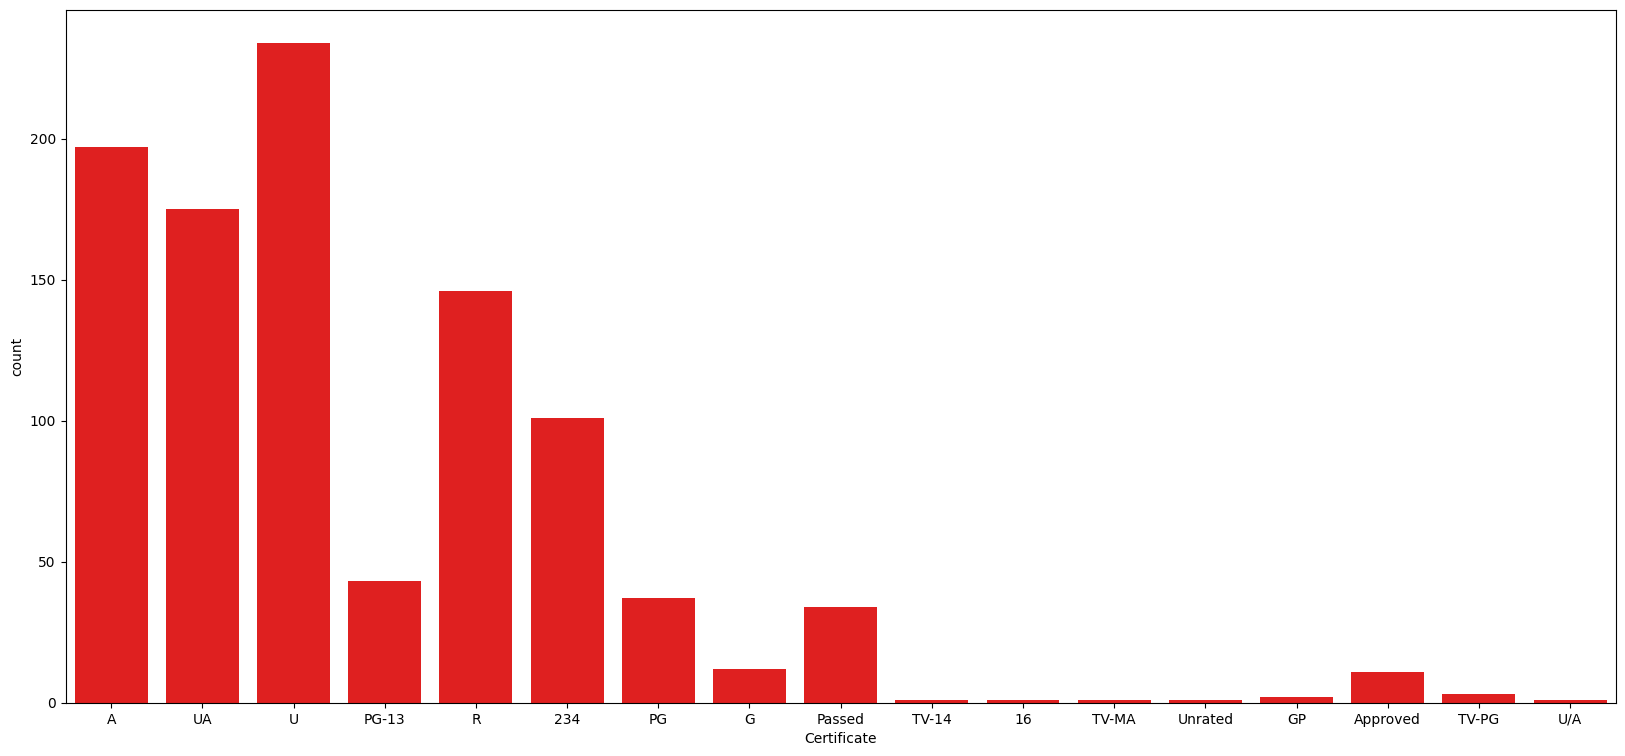

In [31]:
plt.figure(figsize=(20,9))
sns.countplot(x = 'Certificate',data=df,color ='r')

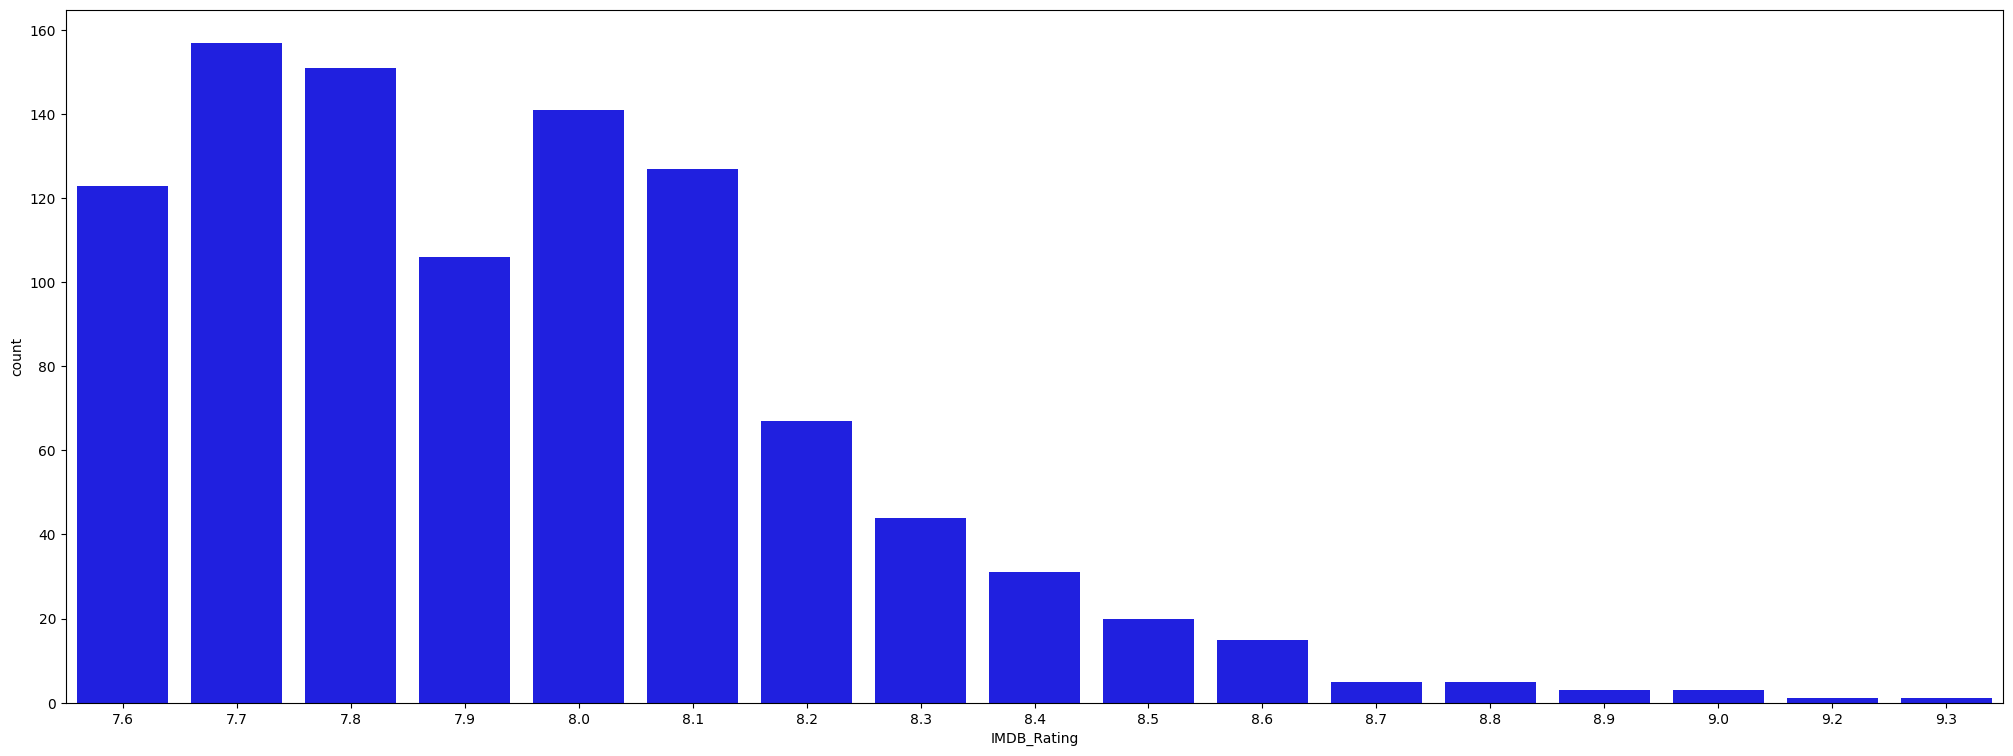

In [32]:
plt.figure(figsize=(25,9))
sns.countplot(x = 'IMDB_Rating',color='blue',data= df)
plt.show();

In [33]:
rating=df.groupby('Series_Title').mean().sort_values('IMDB_Rating',ascending=False).head(10)
rating = rating[['IMDB_Rating']].round(2)
rating.reset_index(inplace=True)
rating


<ipython-input-33-1eaf4e510318>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating=df.groupby('Series_Title').mean().sort_values('IMDB_Rating',ascending=False).head(10)


,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,The Dark Knight,9.0
3,The Godfather: Part II,9.0
4,12 Angry Men,9.0
5,Pulp Fiction,8.9
6,Schindler's List,8.9
7,The Lord of the Rings: The Return of the King,8.9
8,The Lord of the Rings: The Fellowship of the Ring,8.8
9,Inception,8.8


In [43]:
rating = df.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
rating = rating[['IMDB_Rating']].round(2)
rating.reset_index(inplace = True)
rating

<ipython-input-43-4d6b6b95bcdb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating = df.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)


,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


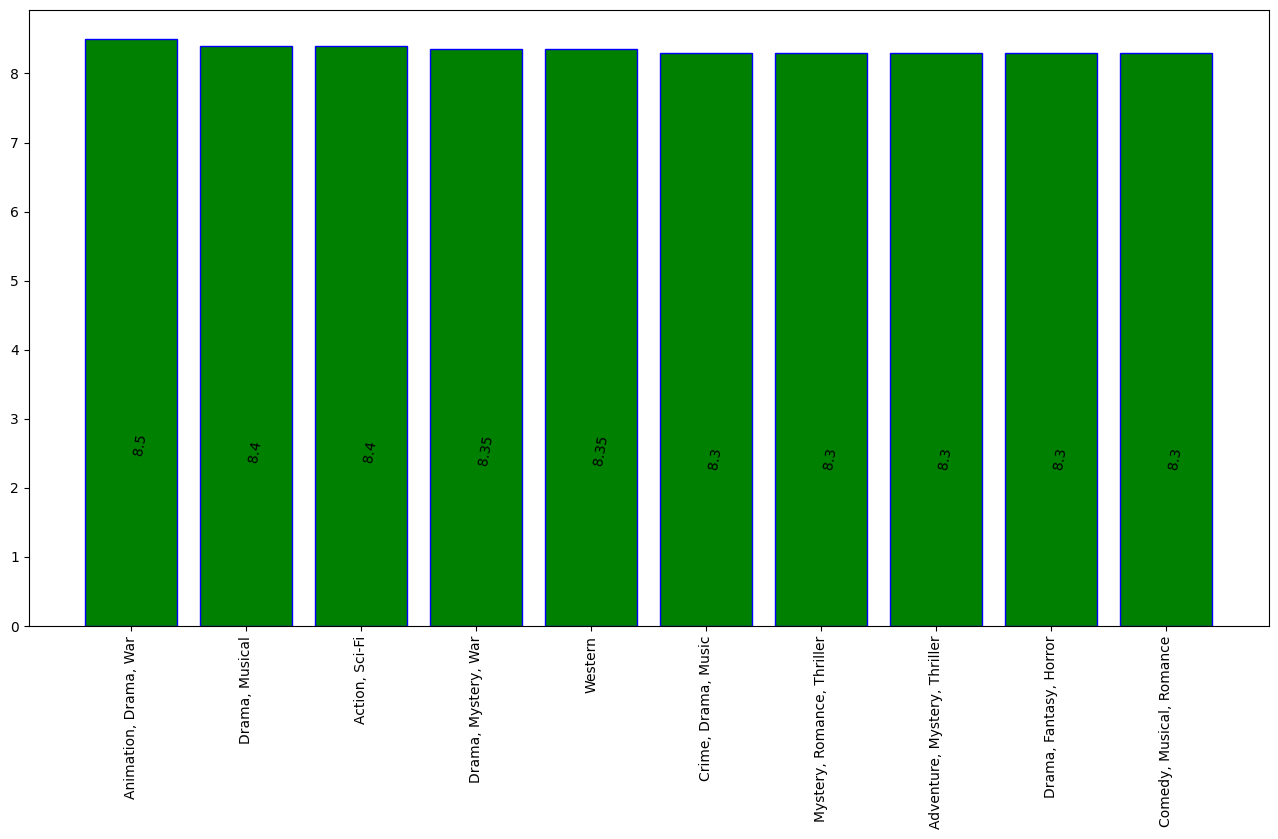

In [45]:
plt.figure(figsize=(16,8))
plt.bar(rating['Genre'],rating['IMDB_Rating'],color='g',edgecolor='blue' )
plt.xticks(rotation=90)
for k,v in rating['IMDB_Rating'].items():
    plt.text(k,v-6,str(v),rotation=80)

In [38]:
rating=df.groupby('Genre').mean().sort_values('Meta_score',ascending=False).head(10)
rating = rating[['Meta_score']].round(2)
rating.reset_index(inplace=True)
rating

<ipython-input-38-e2d443992d12>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rating=df.groupby('Genre').mean().sort_values('Meta_score',ascending=False).head(10)


,Genre,Meta_score
0,"Mystery, Romance, Thriller",100.0
1,"Comedy, Musical, Romance",99.0
2,"Drama, Fantasy, War",98.0
3,"Adventure, Mystery, Thriller",98.0
4,"Comedy, Music, Romance",98.0
5,"Action, Adventure, Romance",97.0
6,"Film-Noir, Mystery, Thriller",97.0
7,"Film-Noir, Mystery",96.0
8,"Film-Noir, Thriller",94.0
9,"Animation, Drama, War",94.0


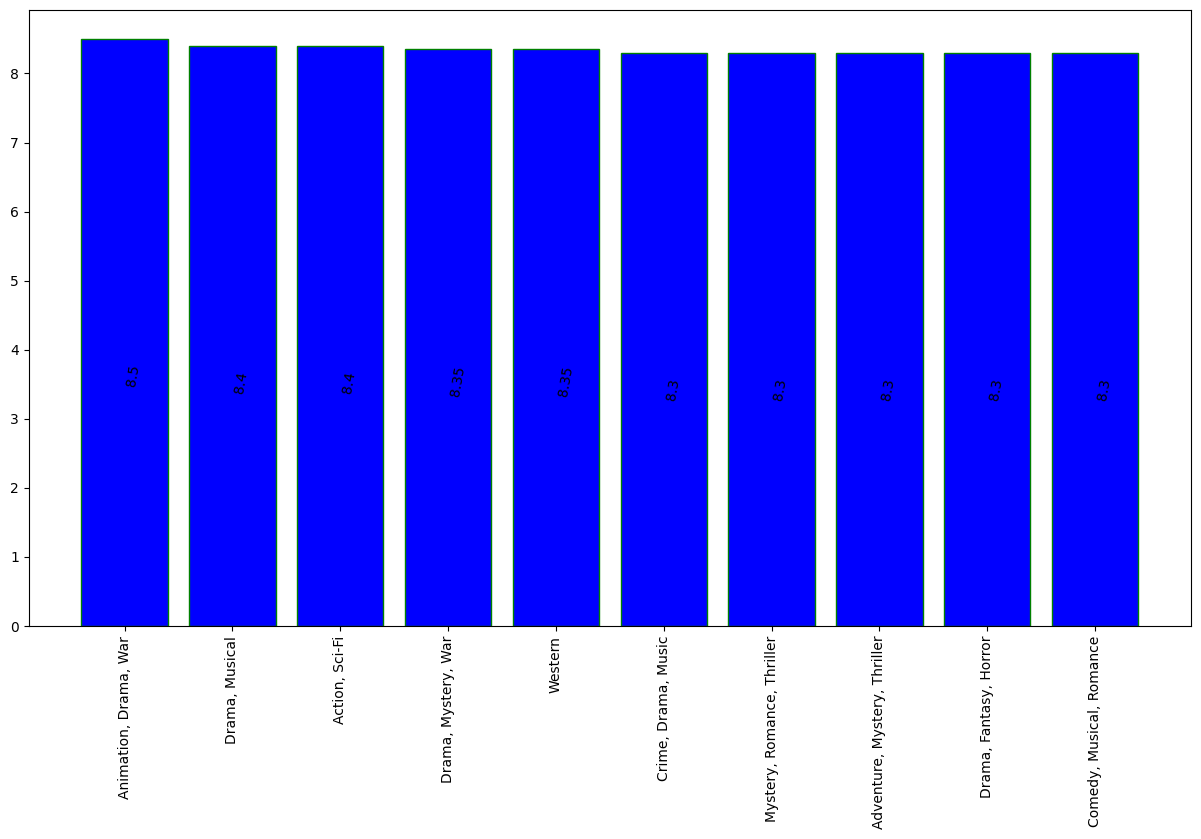

In [46]:
plt.figure(figsize=(15,8))
plt.bar(rating['Genre'],rating['IMDB_Rating'],color='blue',edgecolor='g' )
plt.xticks(rotation=90)
for k,v in rating['IMDB_Rating'].items():
    plt.text(k,v-5,str(v),rotation=80)

<ipython-input-47-15c8ef76be9e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  earning = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)


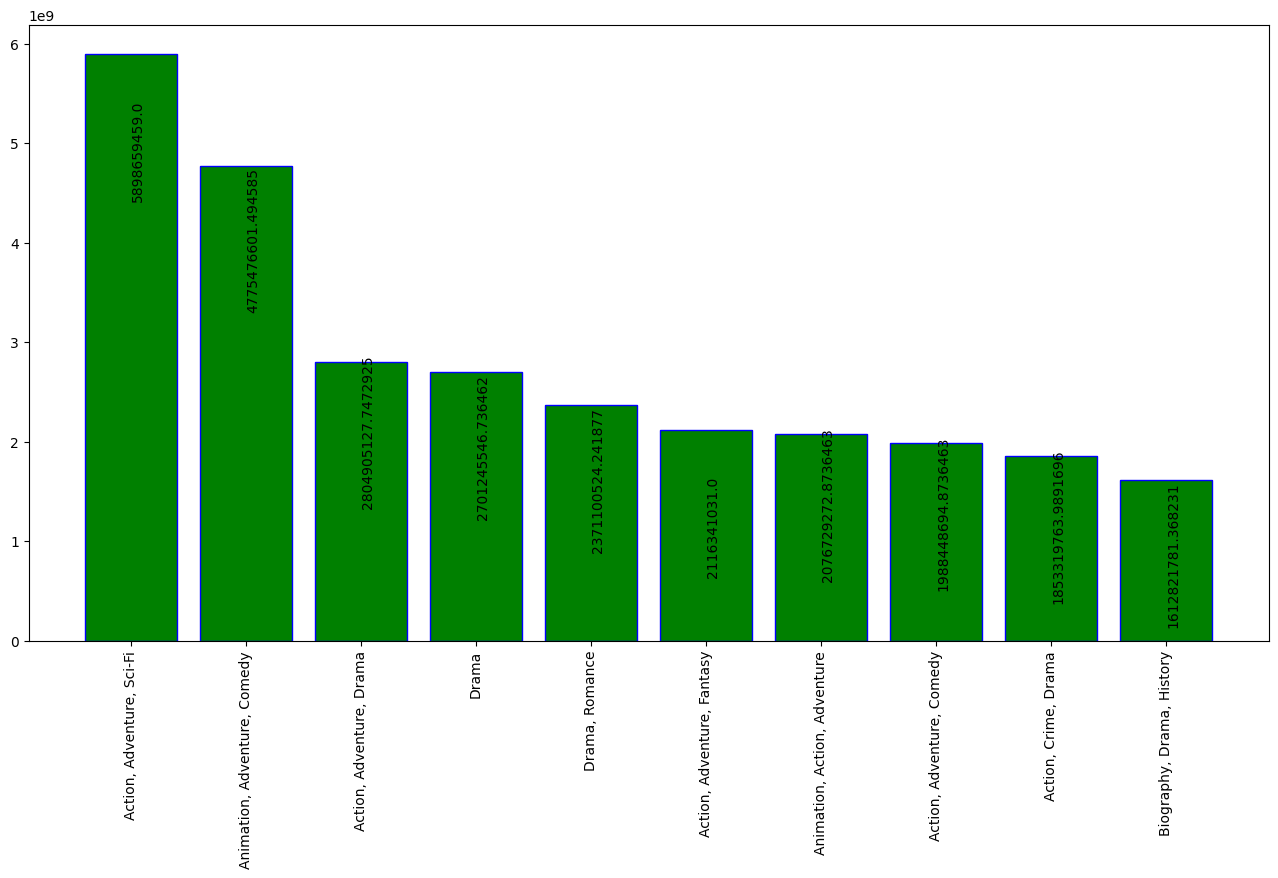

In [47]:
earning = df.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
earning=earning[['Gross']]
earning.reset_index(inplace=True)

plt.figure(figsize=(16,8))
plt.bar(earning['Genre'],earning['Gross'],color='green',edgecolor='blue')
plt.xticks(rotation='vertical')
for k,v in earning['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

<ipython-input-48-1435179ecda3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Certificate',y='Gross',color='blue',data=df,ci=False)


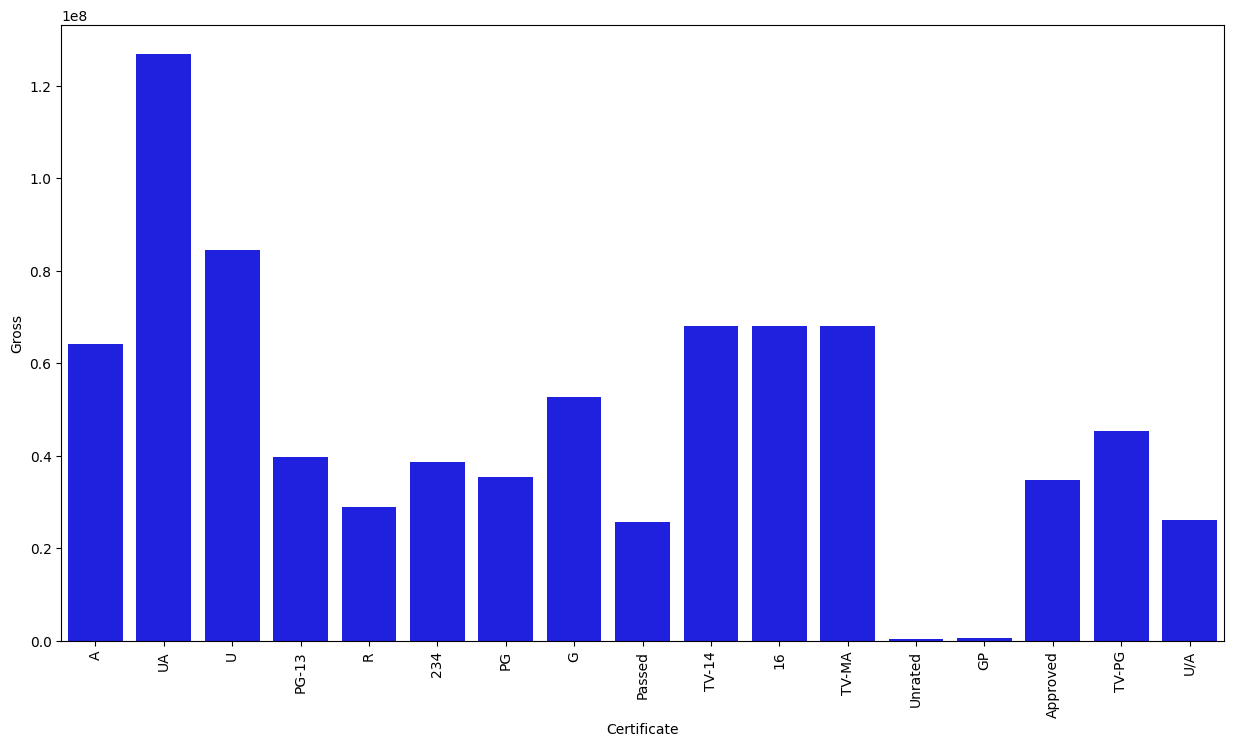

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='Certificate',y='Gross',color='blue',data=df,ci=False)
plt.xticks(rotation='vertical')
plt.show();

<ipython-input-50-9b2871536145>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director=df.groupby('Director').mean().sort_values('Gross').head(10)


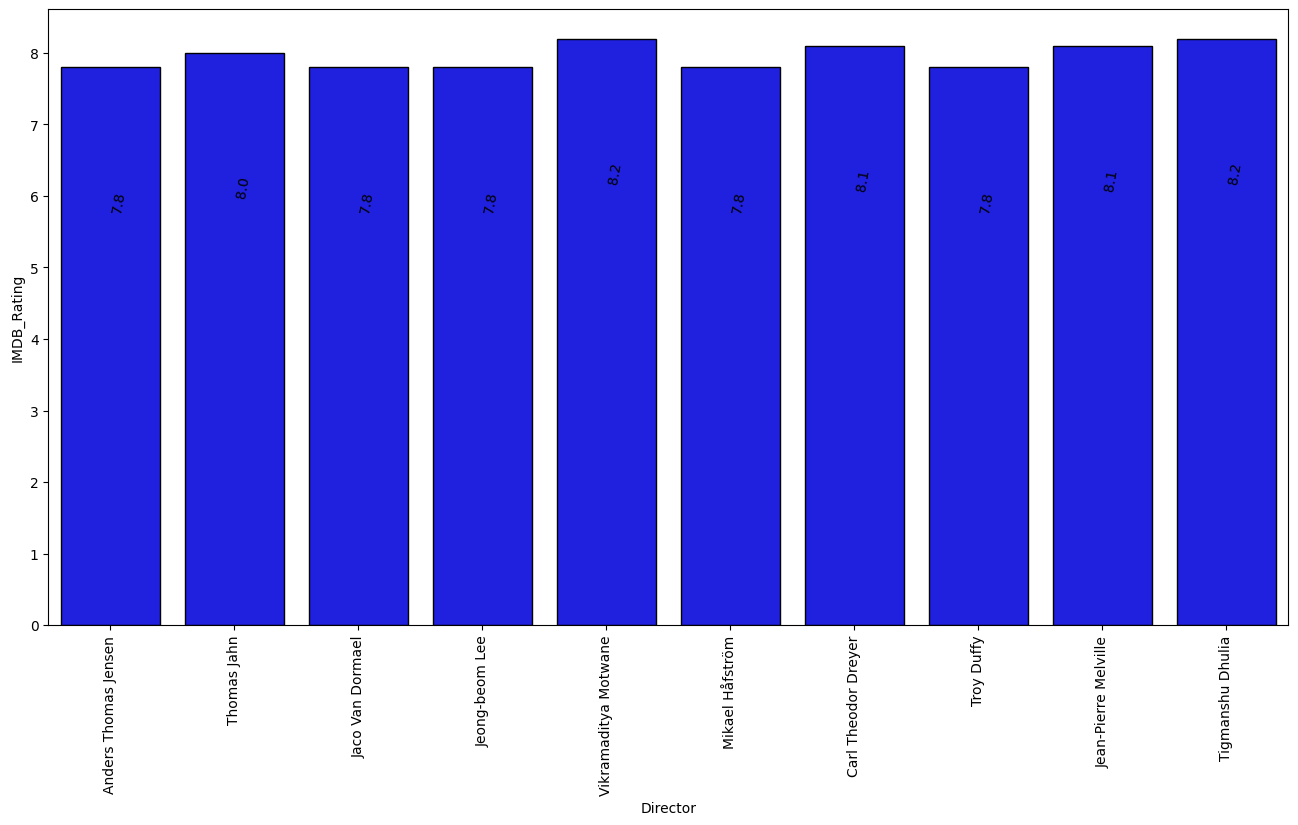

In [50]:
director=df.groupby('Director').mean().sort_values('Gross').head(10)
director=director[['IMDB_Rating']]
director.reset_index(inplace=True)

plt.figure(figsize=(16,8))
sns.barplot(x='Director',y='IMDB_Rating',data=director,color='blue',edgecolor='black')
plt.xticks(rotation='vertical')

for k,v in director['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=80)

<ipython-input-51-c06885f8196d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  director=df.groupby('Director').mean().sort_values('Gross').head(10)


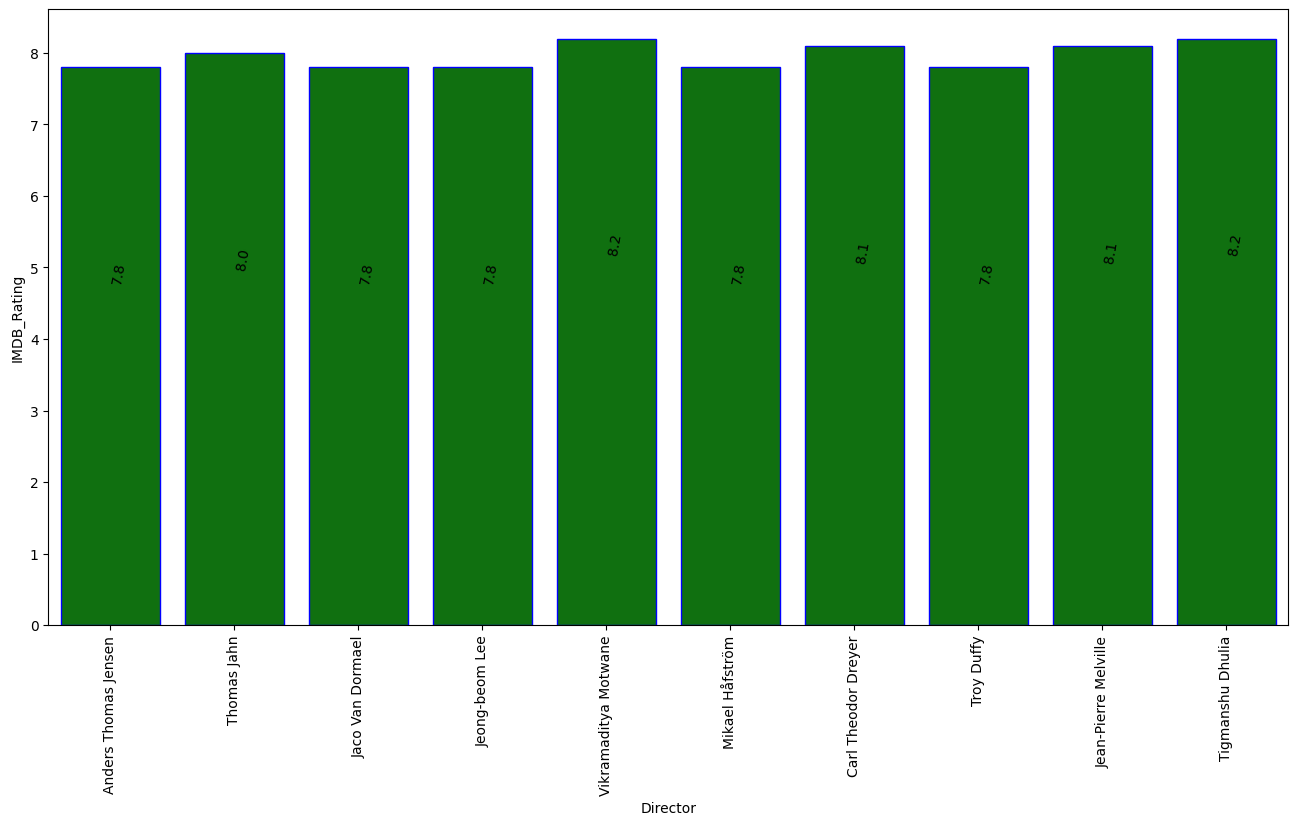

In [51]:
director=df.groupby('Director').mean().sort_values('Gross').head(10)
director=director[['IMDB_Rating']]
director.reset_index(inplace=True)

plt.figure(figsize=(16,8))
sns.barplot(x='Director',y='IMDB_Rating',data=director,color='green',edgecolor='blue')
plt.xticks(rotation='vertical')

for k,v in director['IMDB_Rating'].items():
    plt.text(k,v-3,str(v),rotation=80)

*THANK YOU*